# Truss Element Responses (Pyvista)

In [1]:
import openseespy.opensees as ops
import opstool as opst
import opstool.vis.pyvista as opsvis

In [2]:
opst.load_ops_examples("TrussBridge")  # or your model code here

# add loads
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(3, 0.0, 0.0, -15000.0)
ops.load(4, 0.0, 0.0, -15000.0)
ops.load(5, 0.0, 0.0, -15000.0)
ops.load(6, 0.0, 0.0, -15000.0)
ops.load(7, 0.0, 0.0, -15000.0)
ops.load(8, 0.0, 0.0, -15000.0)
ops.load(17, 0.0, 0.0, -15000.0)
ops.load(18, 0.0, 0.0, -15000.0)
ops.load(19, 0.0, 0.0, -15000.0)
ops.load(20, 0.0, 0.0, -15000.0)

OPSTOOL ::  Model data has been saved to _OPSTOOL_ODB/ModelData-None.nc!

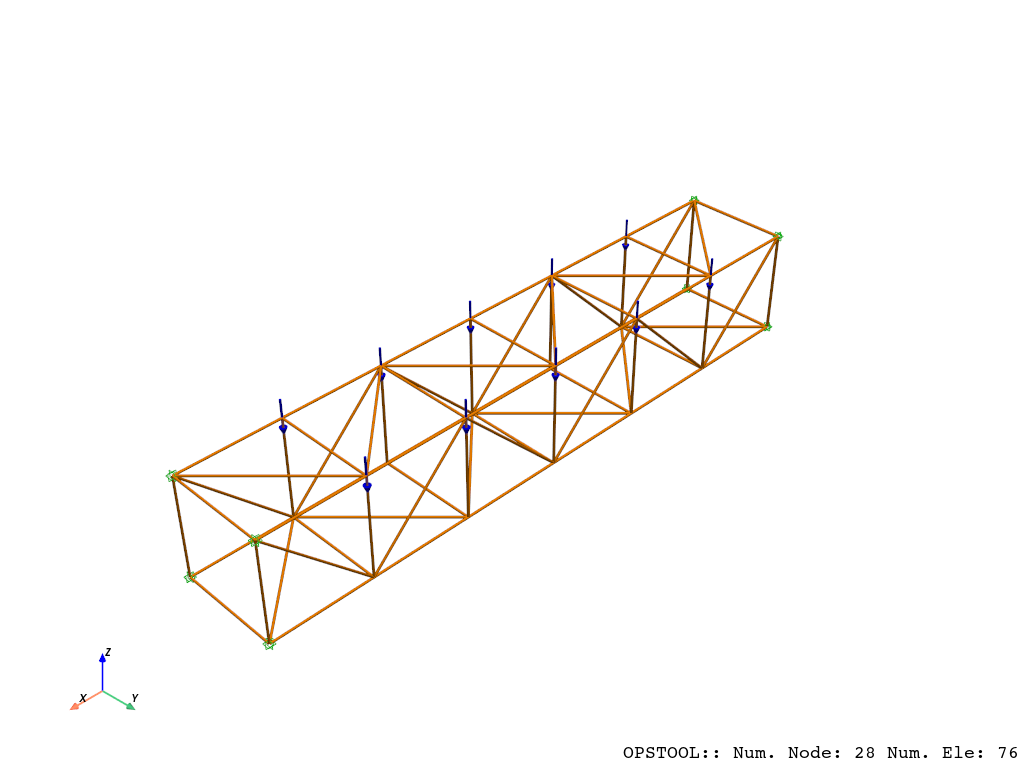

In [3]:
opsvis.set_plot_props(point_size=0, line_width=3, notebook=True)
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [4]:
# ------------------------------
# Start of analysis generation
# ------------------------------
# create SOE
Nsteps = 10
ops.system("ProfileSPD")
# create DOF number
ops.numberer("Plain")
# create constraint handler
ops.constraints("Plain")
# create integrator
ops.integrator("LoadControl", 1.0 / Nsteps)
# create algorithm
ops.algorithm("Newton")
# create test
ops.test("NormUnbalance", 1e-8, 10)
# create analysis object
ops.analysis("Static")

In [5]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(Nsteps):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in _OPSTOOL_ODB/RespStepData-1.nc!

OPSTOOL ::  Loading response data from _OPSTOOL_ODB/RespStepData-1.nc ...

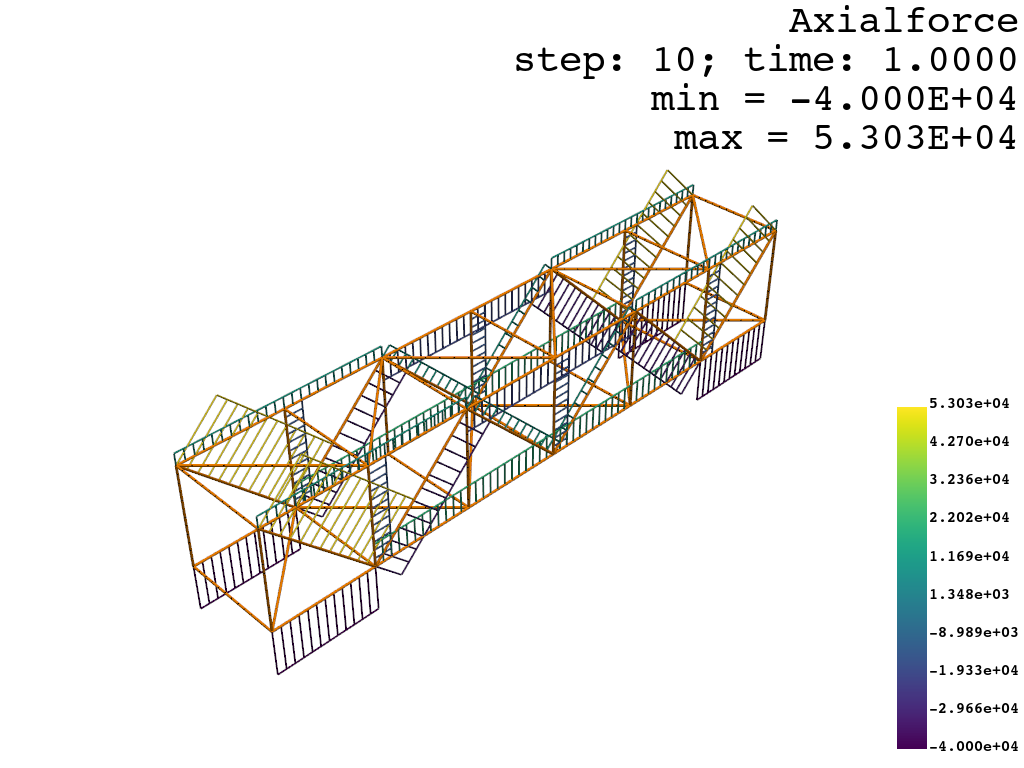

In [6]:
opsvis.set_plot_colors(cmap="viridis")
fig = opsvis.plot_truss_responses(
    odb_tag=1,
    resp_type="axialForce",
    slides=False,
    step="absMax",
    alpha=2.0,
    line_width=2,
    show_values=False,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()